In [1]:
import pandas as pd
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_cities(lons, lats):
    plt.figure(figsize=(16,16))
    ax = plt.axes(projection=ccrs.PlateCarree())
    #ax = plt.axes(projection=ccrs.EuroPP())
    ax.stock_img()
    #ax.coastlines()
    plt.scatter(lons, lats,
             color="blue", marker='o',
             transform=ccrs.Geodetic(),
             )
    plt.show()

In [4]:
data_path = 'data/'

In [5]:
cities = pd.read_csv(data_path + 'worldcitiespop.csv', sep=",")

/home/filip/anaconda2/envs/geo/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
coli = pd.read_csv(data_path + 'Cost_of_living_index.csv', sep=",")

In [7]:
coli.head(5)

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,"Hamilton, Bermuda",137.56,103.03,121.21,126.56,151.77,114.19
1,2,"Zurich, Switzerland",128.65,62.62,97.39,127.35,127.14,142.39
2,3,"Basel, Switzerland",126.89,46.14,88.66,120.44,129.10,141.48
3,4,"Lausanne, Switzerland",119.62,50.35,86.83,116.35,122.83,132.58
4,5,"Bern, Switzerland",118.42,39.22,80.93,114.54,114.86,115.48


In [8]:
coli["City"], coli["Country"] = coli["City"].str.lower().str.split(", ", 1).str

In [9]:
coli.head(12)

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Country
0,1,hamilton,137.56,103.03,121.21,126.56,151.77,114.19,bermuda
1,2,zurich,128.65,62.62,97.39,127.35,127.14,142.39,switzerland
2,3,basel,126.89,46.14,88.66,120.44,129.10,141.48,switzerland
3,4,lausanne,119.62,50.35,86.83,116.35,122.83,132.58,switzerland
4,5,bern,118.42,39.22,80.93,114.54,114.86,115.48,switzerland
5,6,geneva,118.33,69.16,95.06,112.08,119.78,133.47,switzerland
6,7,reykjavik,112.57,57.40,86.45,98.53,127.87,94.21,iceland
7,8,lugano,111.88,49.58,82.39,104.85,120.62,131.26,switzerland
8,9,stavanger,111.00,38.85,76.85,95.97,134.55,112.62,norway
9,10,oslo,107.14,48.58,79.42,93.81,114.42,104.30,norway


In [10]:
cities.head(10)

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,6,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,6,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,6,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,6,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,6,NaN,42.466667,1.483333
5,ad,andorra,Andorra,7,NaN,42.500000,1.516667
6,ad,andorra la vella,Andorra la Vella,7,20430.0,42.500000,1.516667
7,ad,andorra-vieille,Andorra-Vieille,7,NaN,42.500000,1.516667
8,ad,andorre,Andorre,7,NaN,42.500000,1.516667
9,ad,andorre-la-vieille,Andorre-la-Vieille,7,NaN,42.500000,1.516667


In [11]:
cities[cities["City"] == 'oslo']

,Country,City,AccentCity,Region,Population,Latitude,Longitude
2042454,no,oslo,Oslo,12,808690.0,59.916667,10.750000
2929559,us,oslo,Oslo,FL,NaN,27.586389,-80.380556
2971860,us,oslo,Oslo,MN,NaN,48.195278,-97.131667


In [12]:
coli.head(5)

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Country
0,1,hamilton,137.56,103.03,121.21,126.56,151.77,114.19,bermuda
1,2,zurich,128.65,62.62,97.39,127.35,127.14,142.39,switzerland
2,3,basel,126.89,46.14,88.66,120.44,129.10,141.48,switzerland
3,4,lausanne,119.62,50.35,86.83,116.35,122.83,132.58,switzerland
4,5,bern,118.42,39.22,80.93,114.54,114.86,115.48,switzerland


In [13]:
cities.head(5)

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,6,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,6,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,6,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,6,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,6,NaN,42.466667,1.483333


In [14]:
cities[cities["City"] == "zurich"]

,Country,City,AccentCity,Region,Population,Latitude,Longitude
390604,ch,zurich,Zurich,25,346185.0,47.366667,8.550000
822101,dz,zurich,Zurich,55,NaN,36.533333,2.316667
2034363,nl,zurich,Zurich,02,NaN,53.112002,5.395137
2923295,us,zurich,Zurich,CA,NaN,37.182778,-118.259167
2948430,us,zurich,Zurich,KS,NaN,39.234444,-99.437778
2980525,us,zurich,Zurich,MT,NaN,48.584444,-109.029722
2992938,us,zurich,Zurich,NY,NaN,43.150556,-77.043611


In [15]:
new_cities = cities.sort_values("Population", ascending=False)[0:2000].drop_duplicates("City")

In [16]:
new_cities.shape

(1969, 7)

In [17]:
new_cities[(new_cities["City"] == "zurich") | (new_cities["City"] == "berlin")]

,Country,City,AccentCity,Region,Population,Latitude,Longitude
727152,de,berlin,Berlin,16,3398362.0,52.516667,13.40
390604,ch,zurich,Zurich,25,346185.0,47.366667,8.55


In [18]:
new_cities[new_cities["City"] == "tokyo"].head(5)

,Country,City,AccentCity,Region,Population,Latitude,Longitude
1544449,jp,tokyo,Tokyo,40,31480498.0,35.685,139.751389


In [19]:
coli[coli["City"] == "tokyo"].head(5)

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Country
24,25,tokyo,84.78,36.41,61.89,81.72,54.41,113.09,japan


In [20]:
new_df = pd.merge(new_cities, coli, on="City", how="inner")

In [21]:
new_df.shape

(394, 15)

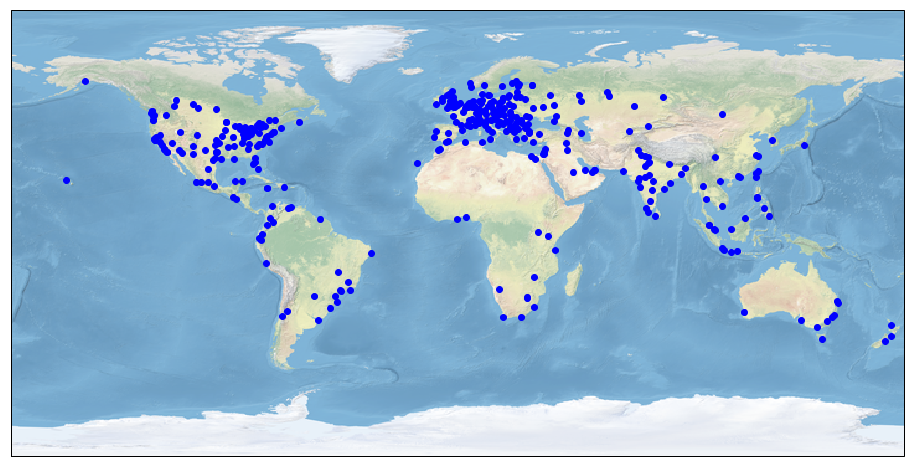

In [22]:
plot_cities(new_df['Longitude'], new_df['Latitude'])
#plot_cities([-75], [43]) # NY